# Dynamical systems

 * dynamic models that relate expression and translation of genes to the current state of the cell
 * typically formulated as systems of differential equations (for example one for each gene)
 * models can be deterministic or stochastic
 * endless scope for complexity (transcription, translation, modifications, nuclear import/export etc...)
 
Such systems are often modeled with __ordinary differential equations__ or short __ODEs__ that we will now explore in some more detail. 

### Systems of ODEs

For a set of variables $x_i$ describing the cell (protein, mRNA concentrations), we can define:

$$
\begin{split}
	\frac{d x_1}{dt} &= f_1(x_1, x_2, \ldots, x_n, t) \\
	\frac{d x_2}{dt} &= f_2(x_1, x_2, \ldots, x_n, t) \\
	\vdots & =  \vdots \\
	\frac{d x_n}{dt} &= f_n(x_1, x_2, \ldots, x_n, t)
\end{split}
$$

 * $f_i(x_1,\ldots, x_n,t)$ describe how rapidly quantity $i$ is changing given the state of the cell.
 * these function could depend on time $t$ (day/night, other perturbations)



### One dimensional dynamical systems

The simplest examples are one-dimensional and independent of time. 

$$
\frac{dx}{dt} = f(x)
$$

In the case of gene expression modeling, the function $f(x)$ typically consists of a production term and a degradation term:

$$
\frac{dx}{dt} = \alpha - \beta x
$$


To analyze the qualitative behavior of such systems, consider the following graph of $f(x)$:
![image.png](figures/fixed_points_1d.png)

Over time, this results in a dynamic like this:
![image.png](figures/convergence_1d.png)

Text(0.5, 0, 't')

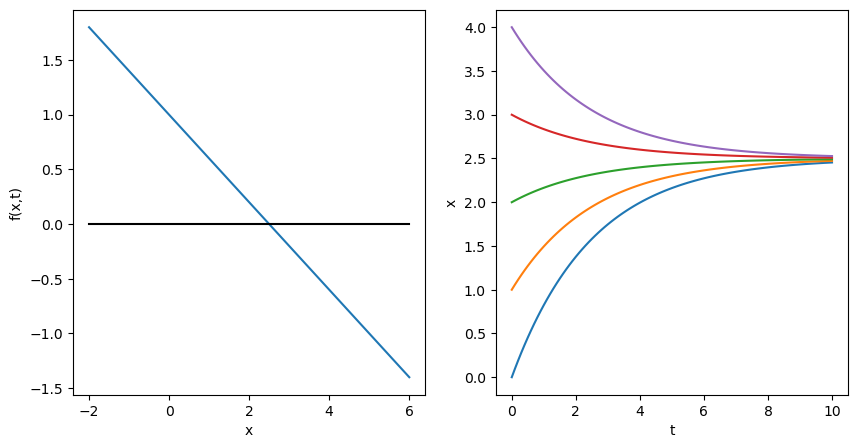

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dxdt(x,t, a, b):
    return a - b*x

a = 1
b = 0.4
t = np.linspace(0,10,101)
x = np.linspace(-2,6, 101)
x0 = 5

## make a figure with two subplots
fig, axs = plt.subplots(1,2, figsize=(10,5))
## plot the derivative f(x,t) = dxdt(x,t)
axs[0].plot(x, dxdt(x,0, a, b))
axs[0].plot(x, np.zeros_like(x), c='k')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x,t)')

## plot the solutions of the ODE for different 
for x0 in [0,1,2,3,4]:
    sol = odeint(dxdt, x0, t, args=(a,b))
    axs[1].plot(t, sol)

axs[1].set_ylabel('x')
axs[1].set_xlabel('t')

 * in one dimensional systems, not many things can happen
 * solution either tend to a stable fixed point, or are dragged around by a time dependent forcing. 

## Two dimensional dynamical systems

Things get a lot more interesting in two dimensions. We'll consider time independent systems like this:

$$
\frac{d x_1}{dt} = f_1(x_1,x_2)\quad\quad
\frac{d x_2}{dt} = f_2(x_1,x_2)
$$

Again, before solving them numerically, we would like to understand how they behave generically.

Instead of on a line (the $x$-axis above), the system now lives in a plane ($x_1,x_2$). 
There are certain special places on that plane, where $f_1(x_1, x_2)$ and/or $f_2(x_1, x_2)$ are zero, meaning the variables $x_1$ and/or $x_2$ don't change.
The lines with $f_1(x_1, x_2)=0$ and $f_2(x_1, x_2)=0$ are called __null-clines__. 




![image.png](figures/fixed_points_2d.png)

### Lotka Volterra system



In [2]:
def derivative_LV(P, t, alpha, beta, gamma):
    x,y = P   # P is a vector with values [x, y]
    dxdt = -beta*x*y + alpha*x
    dydt = beta*x*y - gamma*y
    return [dxdt, dydt]


X, Y = np.meshgrid(np.linspace(0.01,700, 20), np.linspace(0.01,700,20))

Text(0.5, 0, 'prey')

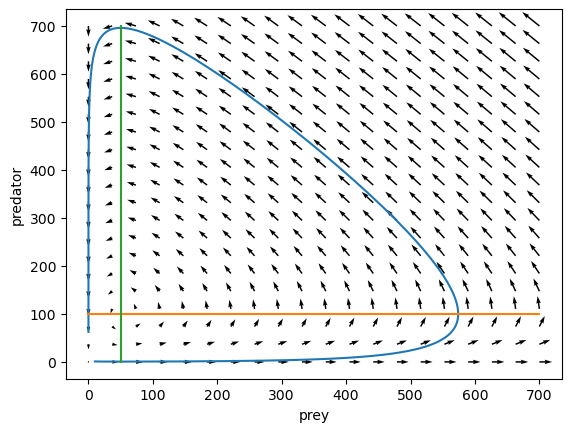

In [3]:
gamma = 1/2 # predator dying in 2 weeks
alpha = 1   # growth rate of prey population in units per week
beta = 0.01 # predation rate 0.01
x0 = 10    # initial population of prey
y0 = 1     # initial population of predator
T = np.linspace(0,10,1001)
sol = odeint(derivative_LV, [x0, y0], T, (alpha, beta, gamma))
plt.plot(sol[:,0], sol[:,1])

dXdt, dYdt = derivative_LV([X,Y], 0, alpha, beta, gamma)
length = np.sqrt(dXdt**2 + dYdt**2)

plt.quiver(X,Y,dXdt/length**0.75, dYdt/length**0.75, angles='xy')
plt.plot([0,700], alpha/beta*np.array([1,1]))
plt.plot(gamma/beta*np.array([1,1]), [0,700])
plt.ylabel('predator')
plt.xlabel('prey')

### SIR model

Text(0.5, 0, 'time')

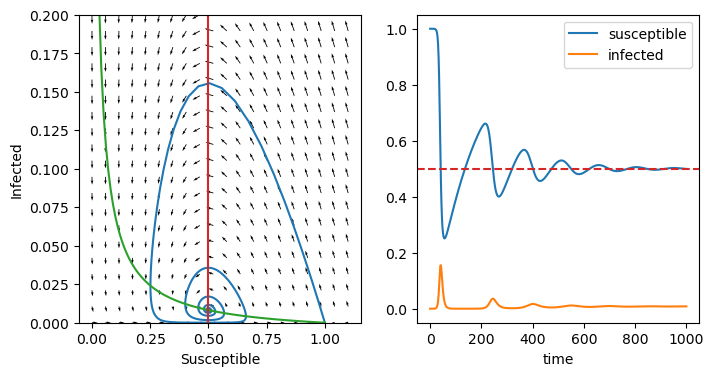

In [19]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

def derivative(y, t, beta, nu, delta):
    S, I = y   # y is a vector with values [S, I]
    dSdt = -beta*S*I + delta*(1-S-I)
    dIdt = beta*S*I - nu*I
    return [dSdt, dIdt]

S, I = np.meshgrid(np.linspace(0.0,1.1, 20), np.linspace(0.0,0.2,20))

I0 = 1e-6
S0 = 1 - I0
nu = 1/3 # recovery after 3 days
delta = 1/180  # susceptible again after 180days
R_0 = 2  # average number of infections per individual
beta = R_0*nu # one infection per day per contact
T = np.linspace(0,1000,1001) # time points for which we want to solve the equation
sol = odeint(derivative, [S0, I0], T, (beta, nu, delta))

axs[0].plot(sol[:,0], sol[:,1])

dSdt, dIdt = derivative([S,I], 0, beta, nu, delta)
length = np.sqrt(dSdt**2 + dIdt**2)

axs[0].quiver(S,I,dSdt/length**0.8, dIdt/length**0.8, angles='xy')
s=np.linspace(0,1,101)

# null cline dS/dt = 0: I = delta*(1-S)/(delta + beta*s)
axs[0].plot(s, delta*(1-s)/(delta+beta*s), c='C2')

# null cline dI/dt = 0 => S = 1/R0 = nu/beta
axs[0].plot(nu/beta*np.array([1,1]), [0,0.2], c='C3')
axs[0].set_ylim(0,0.2)
axs[0].set_ylabel('Infected')
axs[0].set_xlabel('Susceptible')


axs[1].plot(T, sol[:,0], label='susceptible')
axs[1].plot(T, sol[:,1], label='infected')
axs[1].axhline(1/R_0, ls='--', c='C3')
axs[1].legend()
axs[1].set_xlabel('time')

## Dig deeper

 * Change the derivative in the code snippet to different functions $f(x,t)$ and explore the behavior of the ODE. 
 * Replace `odeint` with the forward-Euler algorithm we used previously. Verify that you get the same answer as before.